                     CAR PRICE PREDICTION
>The current project involves analyzing and predicting laptop prices based on various
features. I started by exploring and understanding the dataset, performing data cleaning
and preprocessing steps to prepare the data for modeling. Then, I applied different machine
learning algorithms such as linear regression, decision tree regression, and random forest
regression to train models and make predictions.

>I focused on evaluating the performance of the models using metrics like RMSE (Root
Mean Square Error) and R^2 to assess their accuracy and predictive power. I also
visualized the results through plots and compared the performance of different models

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")


In [11]:
df = pd.read_csv(r"/home/nujaima/Desktop/moshpyth/car_price.csv")

In [12]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# Automated Data Exploration

In [13]:
def explore_data(df):
     # Get the basic information about the DataFrame
     print("Data Shape:")
     print(df.shape)

     print("\nData Head:")
     print(df.head())
 
     print("\nData Columns:")
     print(df.columns)

     print("\nData Info:")
     print(df.info())

     print("\nData Summary:")
     print(df.describe())

     # Check for duplicate rows
     print("\nDuplicate Rows:")
     print(df.duplicated().sum())
     
    

explore_data(df)

     

Data Shape:
(5512, 10)

Data Head:
   Unnamed: 0                                car_name car_prices_in_rupee  \
0           0  Jeep Compass 2.0 Longitude Option BSIV          10.03 Lakh   
1           1            Renault Duster RXZ Turbo CVT          12.83 Lakh   
2           2                      Toyota Camry 2.5 G          16.40 Lakh   
3           3                       Honda Jazz VX CVT           7.77 Lakh   
4           4        Volkswagen Polo 1.2 MPI Highline           5.15 Lakh   

   kms_driven fuel_type transmission  ownership  manufacture   engine    Seats  
0  86,226 kms    Diesel       Manual  1st Owner         2017  1956 cc  5 Seats  
1  13,248 kms    Petrol    Automatic  1st Owner         2021  1330 cc  5 Seats  
2  60,343 kms    Petrol    Automatic  1st Owner         2016  2494 cc  5 Seats  
3  26,696 kms    Petrol    Automatic  1st Owner         2018  1199 cc  5 Seats  
4  69,414 kms    Petrol       Manual  1st Owner         2016  1199 cc  5 Seats  

Data Columns:
I

# data visualization

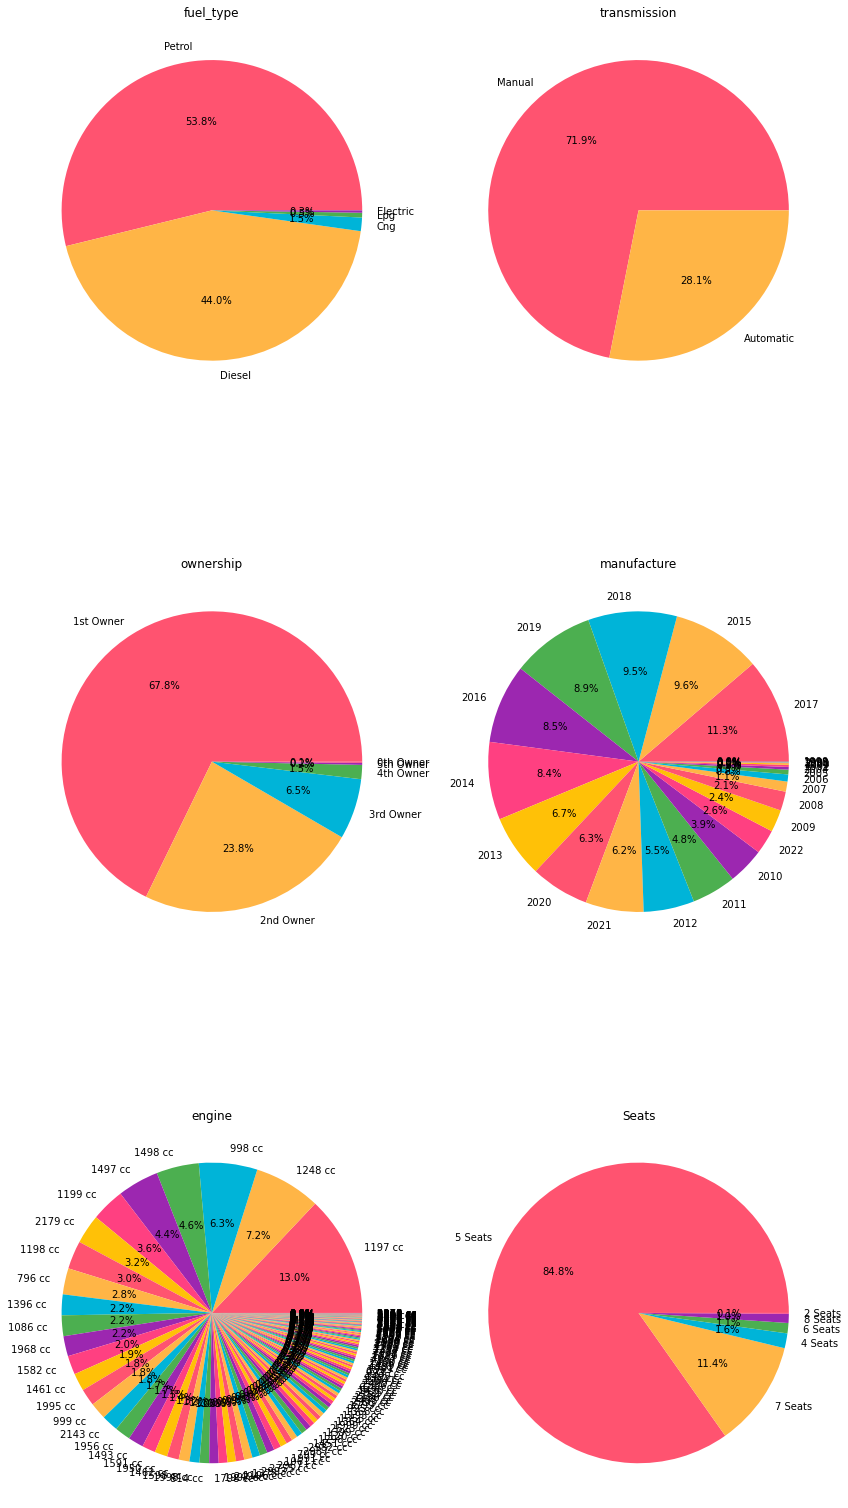

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

pie_columns = [
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats']
colors = ['#FF5370', '#FFB546', '#00B4D8', '#4CAF50', '#9C27B0', '#FF4081', '#FFC107']

fig, axes = plt.subplots(3,2 , figsize=(12,24))
axes = axes.flatten()
for i, col in enumerate(pie_columns):
 value_counts = df[col].value_counts()
 labels = value_counts.index
 values = value_counts.values
 ax = axes[i]
 ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
 ax.set_title(col)
plt.tight_layout()
plt.show()

In [13]:
unique_counts = df['car_prices_in_rupee'].value_counts()
unique_counts

4.50 Lakh     62
3.50 Lakh     62
3 Lakh        58
6.50 Lakh     57
5.50 Lakh     52
2.50 Lakh     50
4 Lakh        50
5.25 Lakh     40
6 Lakh        40
5 Lakh        39
7.50 Lakh     39
4.25 Lakh     35
3.25 Lakh     35
2 Lakh        34
6.75 Lakh     32
7 Lakh        32
1.50 Lakh     28
1.90 Lakh     27
1.80 Lakh     27
1.30 Lakh     27
8 Lakh        26
6.25 Lakh     26
7.75 Lakh     25
5.75 Lakh     24
4.75 Lakh     24
1.20 Lakh     24
1 Lakh        24
10 Lakh       23
7.25 Lakh     22
3.90 Lakh     22
2.90 Lakh     22
8.50 Lakh     22
4.90 Lakh     21
2.30 Lakh     21
9 Lakh        21
4.20 Lakh     21
2.75 Lakh     21
3.40 Lakh     21
4.65 Lakh     20
3.10 Lakh     20
2.25 Lakh     20
2.10 Lakh     20
1.60 Lakh     20
9.50 Lakh     19
6.90 Lakh     19
1.25 Lakh     18
1.10 Lakh     18
9.75 Lakh     18
13 Lakh       18
3.75 Lakh     17
5.90 Lakh     17
1.70 Lakh     16
1.75 Lakh     16
2.70 Lakh     16
3.80 Lakh     16
56.50 Lakh    15
6.10 Lakh     15
10.50 Lakh    15
8.75 Lakh     

In [15]:
from sklearn.preprocessing import LabelEncoder
def automate_label_encoding(dataframe, columns=None):
    encoded_dataframe = dataframe.copy()
    if columns is None or len(columns) == 0:
            print("No columns provided for encoding.")
            choice = input("Automatically select categorical columns and encode? (y/n): ")
            if choice.lower() != 'y':
                print("No encoding performed. Returning original DataFrame.")
                return encoded_dataframe
            categorical_columns = encoded_dataframe.select_dtypes(include=['object']).columns
    else:
        categorical_columns = columns
    for column in categorical_columns:
        label_encoder = LabelEncoder()
        encoded_values = label_encoder.fit_transform(encoded_dataframe[column])
        encoded_dataframe[column] = encoded_values
    return encoded_dataframe
df = automate_label_encoding(df,columns=None)

No columns provided for encoding.
Automatically select categorical columns and encode? (y/n): y


 # "Not Available" to NaN in 'car_price_in_rupee'

In [25]:
print(df.isnull().sum())

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64


# Retrieving the data

In [24]:
test_data = df[df['car_prices_in_rupee'].isna()]
test_data.shape

(0, 10)

# Regression Models for the Price prediction 

Import the libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Prepare the data:

In [27]:
features = df.drop(['car_prices_in_rupee'], axis=1)
target = df['car_prices_in_rupee']

Split the data into training and testing sets:

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Create and train regression models:


Linear Regression:

In [38]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Decision Tree Regression:

In [39]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluate the models:

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Instantiate the decision tree regression model
decision_tree_reg = DecisionTreeRegressor()

# Train the decision tree regression model
decision_tree_reg.fit(X_train, y_train)


# Make predictions on the training set
y_train_pred_linear = linear_reg.predict(X_train)
y_train_pred_decision_tree = decision_tree_reg.predict(X_train)
y_train_pred_random_forest = random_forest_reg.predict(X_train)

# Make predictions on the test set
y_test_pred_linear = linear_reg.predict(X_test)
y_test_pred_decision_tree = decision_tree_reg.predict(X_test)
y_test_pred_random_forest = random_forest_reg.predict(X_test)

# Evaluate the models using metrics
train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
train_rmse_decision_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_decision_tree))
train_rmse_random_forest = np.sqrt(mean_squared_error(y_train, y_train_pred_random_forest))
test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
test_rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_decision_tree))
test_rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_test_pred_random_forest))

train_r2_linear = r2_score(y_train, y_train_pred_linear)
train_r2_decision_tree = r2_score(y_train, y_train_pred_decision_tree)
train_r2_random_forest = r2_score(y_train, y_train_pred_random_forest)
test_r2_linear = r2_score(y_test, y_test_pred_linear)
test_r2_decision_tree = r2_score(y_test, y_test_pred_decision_tree)
test_r2_random_forest = r2_score(y_test, y_test_pred_random_forest)

# Print the evaluation metrics
print(train_rmse_linear,train_rmse_decision_tree,train_rmse_random_forest,test_rmse_linear,test_rmse_decision_tree,test_rmse_random_forest,train_r2_linear,train_r2_decision_tree,train_r2_random_forest,test_r2_linear,test_r2_decision_tree,test_r2_random_forest )


333.41521816315685 0.0 95.26084714257803 328.55655871038806 350.8633865867799 254.6204412699643 0.10106302421985858 1.0 0.9266183815436313 0.12497690696696773 0.0021268560432040617 0.47448421499250293


Model                      Train RMSE  TestRMSE     Train R^2   Test R^2

Linear Regression           333.4152     328.556    0.101       0.12497
 
Decision Tree Regression    0.0          350.8633   81.0        0.00212

Random Forest Regression    95.2608      254.620    0.926       0.47448

RMSE (Root Mean Squared Error):

 >RMSE measures the average deviation of the predicted laptop prices from the actual prices.
Lower values indicate better model performance.

The Decision Tree Regression model has the lowest train RMSE (0.0), indicating it captures
the training data's patterns well. However, it has a higher test RMSE (350.8633), suggesting
overfitting and poor generalization to unseen data. The Random Forest Regression model has a
lower train RMSE (95.260) compared to Linear Regression (333.4152), indicating better
performance in capturing the training data's patterns. The Random Forest Regression model also
has the lowest test RMSE (254.620) among the three models, suggesting better generalization
and performance on unseen data.

R^2 (Coefficient of Determination):

  >R^2 measures the proportion of variance in the target variable (Price) that is predictable
from the independent variables. Higher values indicate better fit and predictive power.

The Decision Tree Regression model has the highest train R^2 (81.0), indicating it explains
almost all the variance in the training data. However, it has a lower test R^2 (0.00212), indicating
overfitting and limited generalization. The Random Forest Regression model has a high train R^2
(0.926) and a relatively high test R^2 (0.47448), indicating good fit and better generalization
compared to the Decision Tree model. The Linear Regression model has lower R^2 values for
both train (0.101) and test (0.124), suggesting it has limited predictive power and may not
capture the underlying patterns well.

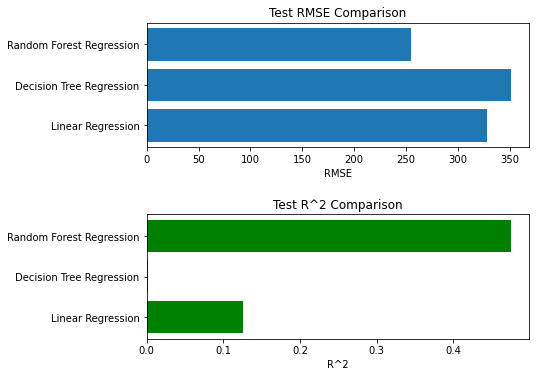

Low Test RMSE & High Test R^2
Overall Performance:
Among the three models, the Random Forest Regression model performs the best based on both RMSE and R^2 metrics.
It has the lowest test RMSE and relatively high test R^2, indicating better generalization and predictive power.
The Decision Tree Regression model shows signs of overfitting, as evidenced by the significant difference between train and test RMSE and the high train R^2 compared to the test R^2.
The Linear Regression model has the poorest performance, with higher RMSE values and lower R^2 scores on both train and test sets.
Based on these observations, the Random Forest Regression model seems to be the most suitable for predicting laptop prices given the dataset, as it provides a good balance between model complexity, fit, and generalization to unseen data.


In [42]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
test_rmse = [test_rmse_linear, test_rmse_decision_tree, test_rmse_random_forest]
test_r2 = [test_r2_linear, test_r2_decision_tree, test_r2_random_forest]

fig, axes = plt.subplots(2, 1, figsize=(6, 8))
axes[0].barh(models, test_rmse)
axes[0].set_title('Test RMSE Comparison')
axes[0].set_xlabel('RMSE')

axes[1].barh(models, test_r2, color='green')
axes[1].set_title('Test R^2 Comparison')
axes[1].set_xlabel('R^2')

plt.tight_layout(pad=2, rect=[0, 0, 1.30, 0.70])
plt.show()

# Additional Information
print("Low Test RMSE & High Test R^2")
print("Overall Performance:")
print("Among the three models, the Random Forest Regression model performs the best based on both RMSE and R^2 metrics.")
print("It has the lowest test RMSE and relatively high test R^2, indicating better generalization and predictive power.")
print("The Decision Tree Regression model shows signs of overfitting, as evidenced by the significant difference between train and test RMSE and the high train R^2 compared to the test R^2.")
print("The Linear Regression model has the poorest performance, with higher RMSE values and lower R^2 scores on both train and test sets.")
print("Based on these observations, the Random Forest Regression model seems to be the most suitable for predicting laptop prices given the dataset, as it provides a good balance between model complexity, fit, and generalization to unseen data.")
